In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
import datetime
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
conn = sqlite3.Connection('/content/drive/MyDrive/Datasets/zippedData/im.db')
table_names = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
display(table_names)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [4]:
#SQLITE Queries from im.db dataset

In [5]:
pd.read_sql("select * from movie_basics;", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [6]:
pd.read_sql("""
select primary_title,averagerating,numvotes
from movie_basics
join movie_ratings USING(movie_id)
where numvotes>100
order by averagerating desc
limit 10;
""", conn)


,primary_title,averagerating,numvotes
0,Gini Helida Kathe,9.9,417
1,Once Upon a Time ... in Hollywood,9.7,5600
2,Eghantham,9.7,639
3,Yeh Suhaagraat Impossible,9.6,624
4,Ananthu V/S Nusrath,9.6,808
5,Ekvtime: Man of God,9.6,2604
6,I Want to Live,9.6,1339
7,D/O Parvathamma,9.6,427
8,Kosovo: A Moment In Civilization,9.5,140
9,Aloko Udapadi,9.5,6509


In [7]:
pd.read_sql("""
select distinct mb.primary_title, p.primary_name as director_name
from movie_basics mb
join directors d USING(movie_id)
join persons p ON d.person_id = p.person_id
where p.primary_name = 'Christopher Nolan';
""", conn)


,primary_title,director_name
0,Interstellar,Christopher Nolan
1,The Dark Knight Rises,Christopher Nolan
2,Inception,Christopher Nolan
3,Dunkirk,Christopher Nolan
4,Tenet,Christopher Nolan


In [8]:
pd.read_sql("""
select p.primary_name, count(*) as appearances
from principals pr
join persons p ON pr.person_id = p.person_id
where pr.category = 'actor'
group by p.primary_name
order by appearances DESC
limit 5;
""", conn)


,primary_name,appearances
0,Eric Roberts,147
1,Brahmanandam,126
2,Prakash Raj,79
3,Mihir Das,71
4,Tom Sizemore,70


In [9]:
pd.read_sql("""
select  m.primary_title as MOVIE,group_concat(p.primary_name, ', ') as WRITERS
from writers w
join persons p on w.person_id = p.person_id
join  movie_basics m on w.movie_id = m.movie_id
where m.primary_title = 'The Dark Knight Rises'
group by m.primary_title;

""",conn)

# writer - movie_id	person_id
# person_id	primary_name	birth_year	death_year

,MOVIE,WRITERS
0,The Dark Knight Rises,"Bob Kane, David S. Goyer, Christopher Nolan, J..."


In [10]:
pd.read_sql("""
select p.primary_name AS director_name, m.primary_title
from persons p
left join directors d ON p.person_id = d.person_id
left join movie_basics m ON d.movie_id = m.movie_id;
""", conn)

,director_name,primary_title
0,Mary Ellen Bauder,None
1,Joseph Bauer,None
2,Bruce Baum,None
3,Axel Baumann,None
4,Pete Baxter,None
...,...,...
788563,Joo Yeon So,None
788564,Madeline Smith,None
788565,Michelle Modigliani,None
788566,Pegasus Envoyé,Now and Not Later - Embrace the Moment


In [11]:
#right join
pd.read_sql("""
select p.primary_name AS director_name, m.primary_title
from movie_basics m
left join directors d on d.movie_id = m.movie_id
left join persons p on d.person_id=p.person_id;
""",conn)

,director_name,primary_title
0,Harnam Singh Rawail,Sunghursh
1,Harnam Singh Rawail,Sunghursh
2,Harnam Singh Rawail,Sunghursh
3,Harnam Singh Rawail,Sunghursh
4,Mani Kaul,One Day Before the Rainy Season
...,...,...
296896,Kiran Gawade,6 Gunn
296897,Vinicius Augusto Bozzo,Chico Albuquerque - Revelações
296898,Vinicius Augusto Bozzo,Chico Albuquerque - Revelações
296899,Angela Gurgel,Chico Albuquerque - Revelações


In [12]:
#Inner Join
pd.read_sql("""
SELECT distinct m.primary_title, p.primary_name AS director_name
FROM movie_basics m
JOIN directors d ON m.movie_id = d.movie_id
JOIN persons p ON d.person_id = p.person_id;
""", conn)
# WHERE p.primary_name = 'Joo Yeon So'

,primary_title,director_name
0,Sunghursh,Harnam Singh Rawail
1,One Day Before the Rainy Season,Mani Kaul
2,The Other Side of the Wind,Orson Welles
3,Sabse Bada Sukh,Hrishikesh Mukherjee
4,The Wandering Soap Opera,Raoul Ruiz
...,...,...
162868,Rodolpho Teóphilo - O Legado de um Pioneiro,Ana Célia de Oliveira
162869,Dankyavar Danka,Kanchan Nayak
162870,6 Gunn,Kiran Gawade
162871,Chico Albuquerque - Revelações,Vinicius Augusto Bozzo


In [13]:

df_movie_ratings = pd.read_sql("""SELECT * FROM movie_ratings; """, conn)

df_movie_details = pd.read_sql("""SELECT * FROM movie_basics; """, conn)


df_movies_with_reviews = pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
""", conn)

conn.close()

In [14]:
df_movie_details.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [15]:
#Understanding other datasets:

In [16]:
df_gross_collections = pd.read_csv('/content/drive/MyDrive/Datasets/zippedData/bom.movie_gross.csv')
df_movie_info = pd.read_csv('/content/drive/MyDrive/Datasets/zippedData/rt.movie_info.tsv', delimiter='\t')
df_review = pd.read_csv('/content/drive/MyDrive/Datasets/zippedData/rt.reviews.tsv', delimiter='\t', encoding='latin-1')
df_movies = pd.read_csv('/content/drive/MyDrive/Datasets/zippedData/tmdb.movies.csv') #data from tmdb
df_movie_budgets = pd.read_csv('/content/drive/MyDrive/Datasets/zippedData/tn.movie_budgets.csv')

In [17]:
display(df_gross_collections.head())
display(df_review.head())
display(df_movie_budgets.head())
display(df_movie_info.head())
display(df_movies.head())
display(df_movies_with_reviews.head())

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [18]:
# DataSet Analysis

In [19]:
df_movies_with_reviews.info()
df_movies_with_reviews['start_year'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


,start_year
count,73856.000000
mean,2014.276132
std,2.614807
min,2010.000000
25%,2012.000000
50%,2014.000000
75%,2016.000000
max,2019.000000


In [20]:
df_gross_collections.info()
df_gross_collections['year'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,year
count,3387.000000
mean,2013.958075
std,2.478141
min,2010.000000
25%,2012.000000
50%,2014.000000
75%,2016.000000
max,2018.000000


In [21]:
df_movies.info()

df_movies['year'] = pd.DatetimeIndex(df_movies['release_date']).year
df_movies['year'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


,year
count,26517.000000
mean,2013.953162
std,3.544641
min,1930.000000
25%,2012.000000
50%,2014.000000
75%,2016.000000
max,2020.000000


In [22]:
df_movie_budgets.info()


df_movie_budgets['year'] = pd.DatetimeIndex(df_movie_budgets['release_date']).year
df_movie_budgets['month'] = pd.DatetimeIndex(df_movie_budgets['release_date']).month

df_movie_budgets['year'].describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,year
count,5782.000000
mean,2003.967139
std,12.724386
min,1915.000000
25%,2000.000000
50%,2007.000000
75%,2012.000000
max,2020.000000


In [23]:
display(df_movie_budgets.head())

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,12
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,5
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,6
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,5
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017,12


In [24]:
test = pd.merge(df_movies_with_reviews, df_movie_budgets, left_on='primary_title', right_on='movie')
test.info()

print("Movies with same title and different start years: ",
      len(test[test['start_year'] != test['year']]))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875 entries, 0 to 2874
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           2875 non-null   object 
 1   primary_title      2875 non-null   object 
 2   original_title     2875 non-null   object 
 3   start_year         2875 non-null   int64  
 4   runtime_minutes    2757 non-null   float64
 5   genres             2867 non-null   object 
 6   averagerating      2875 non-null   float64
 7   numvotes           2875 non-null   int64  
 8   id                 2875 non-null   int64  
 9   release_date       2875 non-null   object 
 10  movie              2875 non-null   object 
 11  production_budget  2875 non-null   object 
 12  domestic_gross     2875 non-null   object 
 13  worldwide_gross    2875 non-null   object 
 14  year               2875 non-null   int32  
 15  month              2875 non-null   int32  
dtypes: float64(2), int32(2),

In [25]:
#Creating column test_key for creating a composite key movie-name : year

In [26]:
df_movies_with_reviews['test_key'] =  df_movies_with_reviews['start_year'].astype(str) + " " + df_movies_with_reviews['primary_title']
df_movie_budgets['test_key'] = df_movie_budgets['year'].astype(str) + " " + df_movie_budgets['movie']
df_movies['test_key'] = df_movies['year'].astype(str) + " " + df_movies['title']
df_gross_collections['test_key'] = df_gross_collections['year'].astype(str) + " " + df_gross_collections['title']

test = pd.merge(df_movies_with_reviews, df_movie_budgets, on='test_key')
display(test.info())

test2 = pd.merge(df_movies, df_movie_budgets, on='test_key')
display(test2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1498 non-null   object 
 1   primary_title      1498 non-null   object 
 2   original_title     1498 non-null   object 
 3   start_year         1498 non-null   int64  
 4   runtime_minutes    1490 non-null   float64
 5   genres             1496 non-null   object 
 6   averagerating      1498 non-null   float64
 7   numvotes           1498 non-null   int64  
 8   test_key           1498 non-null   object 
 9   id                 1498 non-null   int64  
 10  release_date       1498 non-null   object 
 11  movie              1498 non-null   object 
 12  production_budget  1498 non-null   object 
 13  domestic_gross     1498 non-null   object 
 14  worldwide_gross    1498 non-null   object 
 15  year               1498 non-null   int32  
 16  month              1498 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1758 non-null   int64  
 1   genre_ids          1758 non-null   object 
 2   id_x               1758 non-null   int64  
 3   original_language  1758 non-null   object 
 4   original_title     1758 non-null   object 
 5   popularity         1758 non-null   float64
 6   release_date_x     1758 non-null   object 
 7   title              1758 non-null   object 
 8   vote_average       1758 non-null   float64
 9   vote_count         1758 non-null   int64  
 10  year_x             1758 non-null   int32  
 11  test_key           1758 non-null   object 
 12  id_y               1758 non-null   int64  
 13  release_date_y     1758 non-null   object 
 14  movie              1758 non-null   object 
 15  production_budget  1758 non-null   object 
 16  domestic_gross     1758 

None

In [27]:
#Data Cleaning

In [28]:
df_movie_budgets['production_budget'] = [int(budget[1:].replace(',','')) for budget in
                                                df_movie_budgets['production_budget']]
df_movie_budgets['domestic_gross'] = [int(budget[1:].replace(',','')) for budget in
                                             df_movie_budgets['domestic_gross']]
df_movie_budgets['worldwide_gross'] = [int(budget[1:].replace(',','')) for budget in
                                              df_movie_budgets['worldwide_gross']]

In [29]:
display(df_movie_budgets['release_date'][0]) # date format is MMM-DD-YYYY
display(df_movies['release_date'][0]) # date format is %Y-%m-%d

df_movie_budgets['release_date'] = [datetime.datetime.strptime(date, '%b %d, %Y')
                                    for date in df_movie_budgets['release_date']]
df_movies['release_date'] = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in df_movies['release_date']]

'Dec 18, 2009'

'2010-11-19'

In [30]:
df_movies.info()
df_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         26517 non-null  int64         
 1   genre_ids          26517 non-null  object        
 2   id                 26517 non-null  int64         
 3   original_language  26517 non-null  object        
 4   original_title     26517 non-null  object        
 5   popularity         26517 non-null  float64       
 6   release_date       26517 non-null  datetime64[ns]
 7   title              26517 non-null  object        
 8   vote_average       26517 non-null  float64       
 9   vote_count         26517 non-null  int64         
 10  year               26517 non-null  int32         
 11  test_key           26517 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3), object(5)
memory usage: 2.3+ MB
<class 'pandas.core.frame.Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
 8   test_key         73856 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 5.1+ MB


43

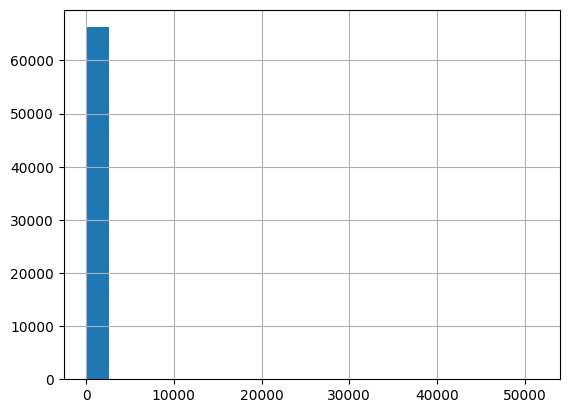

In [31]:
df_movies_with_reviews.info()

df_movies_with_reviews['runtime_minutes'].hist(bins=20)

display(len(df_movies_with_reviews[df_movies_with_reviews['runtime_minutes']>300]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  73856 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
 8   test_key         73856 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 5.1+ MB


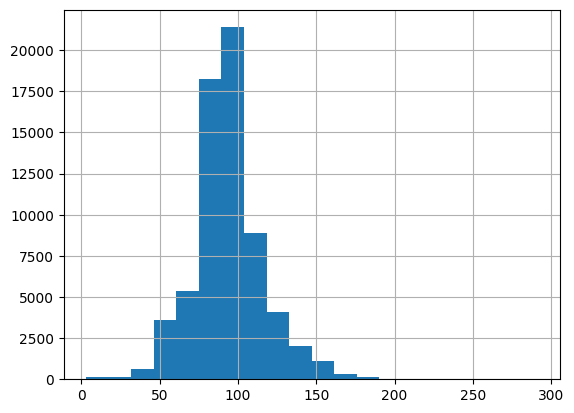

In [32]:
df_movies_with_reviews['runtime_minutes'][df_movies_with_reviews['runtime_minutes']<300].hist(bins=20)
repl = df_movies_with_reviews['runtime_minutes'][df_movies_with_reviews['runtime_minutes']<300].mean()
df_movies_with_reviews['runtime_minutes'] = df_movies_with_reviews['runtime_minutes'].fillna(repl)
df_movies_with_reviews.info()


In [33]:
genre_dict = {'Action': '28',
             'Adventure': '12',
             'Animation': '16',
             'Comedy': '35',
             'Crime': '80',
             'Documentary': '99',
             'Drama': '18',
             'Family': '10751',
             'Fantasy': '14',
             'History': '36',
             'Horror': '27',
             'Music': '10402',
             'Mystery': '9648',
             'Romance': '10749',
             'Science Fiction': '878',
             'TV Movie': '10770',
             'Thriller': '53',
             'War': '10752',
             'Western': '37'}

# Transform genre ID to genre using this function
def get_key(val):
    for key, value in genre_dict.items():
        if val == value:
            return key

df_movies['genre_ids'] = [genres.strip('][').split(', ') for genres in df_movies['genre_ids']]


df_movies['genre_list'] = [[get_key(val) for val in genres] for genres in df_movies['genre_ids']]

genre_list = list(genre_dict.keys())

stringsCheck = genre_list
df_movies['genres'] = [','.join(map(str, g)) for g in df_movies['genre_list']]
for i in stringsCheck:
    df_movies[f'{i}'] = np.where(df_movies.genres.str.contains(f'{i}'), 1, 0)

display(df_movies.head())

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,...,0,0,0,0,0,0,0,0,0,0
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,0,0,0,0,0,0,0,0,0,0
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,0,0,0,0,0,1,0,0,0,0
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,...,0,0,0,0,0,0,0,0,0,0
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,...,0,0,0,0,0,1,0,0,0,0


In [34]:
df_movies_with_reviews.dropna(subset='genres', inplace=True) # drop rows with missing genre

df_movies_with_reviews['genre_list'] = [genres.split(',') for genres in df_movies_with_reviews['genres']]

genre_list = [item for sublist in df_movies_with_reviews['genre_list'] for item in sublist]
genre_list = list(set(genre_list))

# create columns for genre category
stringsCheck = genre_list
for i in stringsCheck:
    df_movies_with_reviews[f'{i}'] = np.where(df_movies_with_reviews.genres.str.contains(f'{i}'), 1, 0)

In [35]:
df_movie_budgets['foreign_gross'] = df_movie_budgets['worldwide_gross'] - df_movie_budgets['domestic_gross']
df_movie_budgets['profit'] = df_movie_budgets['worldwide_gross'] - df_movie_budgets['production_budget']
df_movie_budgets['profit_margin'] = df_movie_budgets['profit'] / df_movie_budgets['worldwide_gross']
df_movie_budgets['roi'] = df_movie_budgets['profit'] / df_movie_budgets['production_budget']
df_movie_budgets['pct_foreign'] = df_movie_budgets['foreign_gross'] / df_movie_budgets['worldwide_gross']
df_movie_budgets['pct_foreign'] = df_movie_budgets['pct_foreign'].fillna(0) # null values due to 0 worldwide gross

df_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
 6   year               5782 non-null   int32         
 7   month              5782 non-null   int32         
 8   test_key           5782 non-null   object        
 9   foreign_gross      5782 non-null   int64         
 10  profit             5782 non-null   int64         
 11  profit_margin      5782 non-null   float64       
 12  roi                5782 non-null   float64       
 13  pct_foreign        5782 non-null   float64       
dtypes: datet

In [36]:
df_movies.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count',
       'year', 'test_key', 'genre_list', 'genres', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [37]:
df_movies_with_reviews.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'test_key',
       'genre_list', 'Musical', 'Action', 'Family', 'Reality-TV', 'Adult',
       'Sci-Fi', 'Drama', 'Sport', 'Fantasy', 'Comedy', 'Crime', 'Music',
       'Short', 'Animation', 'History', 'Documentary', 'Western', 'Romance',
       'War', 'Thriller', 'Adventure', 'Mystery', 'News', 'Horror',
       'Biography', 'Game-Show'],
      dtype='object')

In [38]:
df_movies['match_key'] = df_movies['year'].astype(str) + " " + df_movies['original_title']
df_movie_budgets['match_key'] = df_movie_budgets['year'].astype(str) + " " + df_movie_budgets['movie']

# only keeping columns we need
df_movies = df_movies[['popularity', 'release_date', 'original_language',
                       'vote_average', 'vote_count', 'genre_list', 'genres', 'Action', 'Adventure',
                       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
                       'Western', 'match_key']]
df_movie_budgets = df_movie_budgets[['movie', 'year', 'production_budget', 'domestic_gross', 'foreign_gross',
                                     'worldwide_gross', 'month', 'profit', 'profit_margin', 'roi',
                                     'pct_foreign', 'match_key']]


# merge on key
df_final = pd.merge(df_movie_budgets, df_movies, on='match_key')

In [39]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759 entries, 0 to 1758
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie              1759 non-null   object        
 1   year               1759 non-null   int32         
 2   production_budget  1759 non-null   int64         
 3   domestic_gross     1759 non-null   int64         
 4   foreign_gross      1759 non-null   int64         
 5   worldwide_gross    1759 non-null   int64         
 6   month              1759 non-null   int32         
 7   profit             1759 non-null   int64         
 8   profit_margin      1759 non-null   float64       
 9   roi                1759 non-null   float64       
 10  pct_foreign        1759 non-null   float64       
 11  match_key          1759 non-null   object        
 12  popularity         1759 non-null   float64       
 13  release_date       1759 non-null   datetime64[ns]
 14  original

In [40]:
df_final['year'].describe()

,year
count,1759.000000
mean,2013.191018
std,4.934025
min,1946.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2019.000000


In [41]:
df_final.to_csv('final_dataset.csv')

In [42]:
df_final.head()

,movie,year,production_budget,domestic_gross,foreign_gross,worldwide_gross,month,profit,profit_margin,roi,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,Avatar,2009,425000000,760507625,2015837654,2776345279,12,2351345279,0.846921,5.532577,...,0,0,0,0,0,1,0,0,0,0
1,Pirates of the Caribbean: On Stranger Tides,2011,410600000,241063875,804600000,1045663875,5,635063875,0.607331,1.546673,...,0,0,0,0,0,0,0,0,0,0
2,Avengers: Age of Ultron,2015,330600000,459005868,944008095,1403013963,5,1072413963,0.764364,3.243841,...,0,0,0,0,0,1,0,0,0,0
3,Avengers: Infinity War,2018,300000000,678815482,1369318718,2048134200,4,1748134200,0.853525,5.827114,...,0,0,0,0,0,0,0,0,0,0
4,Justice League,2017,300000000,229024295,426920914,655945209,11,355945209,0.542645,1.186484,...,0,0,0,0,0,1,0,0,0,0


In [43]:
# EDA

<Axes: >

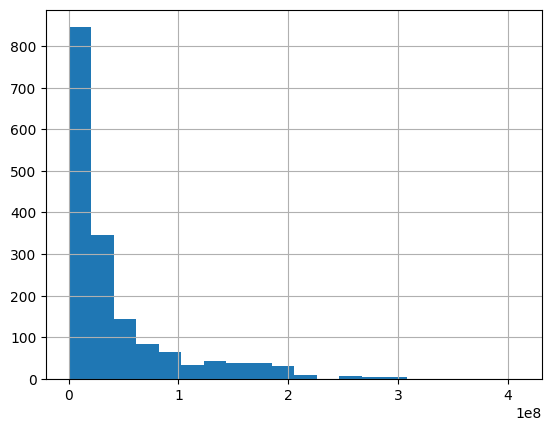

In [44]:
df_final[(df_final['year'] >= 2010)]['production_budget'].hist(bins=20) # distribution of movie budgets

<Axes: >

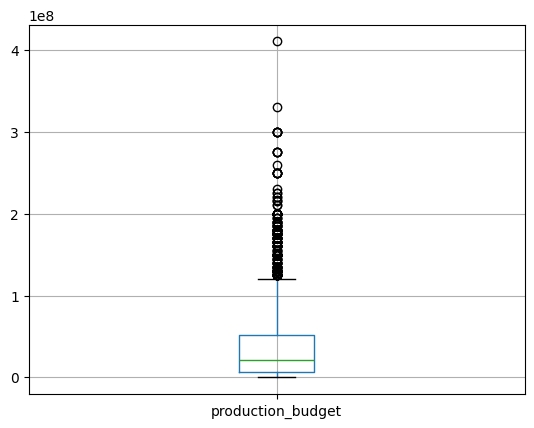

In [45]:
df_final[(df_final['year'] >= 2010)].boxplot(column='production_budget')

In [46]:
q1, q2, q3, q4 = np.percentile(df_final[(df_final['year'] >= 2010)]['production_budget'], [25, 50, 75, 100])
iqr = q3 - q1

print("Interquartile range:", iqr)
print("First Quartile:", q1)
print("Second Quartile:", q2)
print("Third Quartile:", q3)
print("Fourth Quartile:", q4)

Interquartile range: 45250000.0
First Quartile: 7000000.0
Second Quartile: 21000000.0
Third Quartile: 52250000.0
Fourth Quartile: 410600000.0


In [47]:
df_final_subset = df_final[(df_final['year'] >= 2010) & (df_final['production_budget'] > 7000000)]
for k,v in df_final_subset.iterrows():
    if df_final_subset.loc[k, 'production_budget'] < 21000000:
        df_final_subset.loc[k, 'budget_category'] = 'medium'
    elif ((df_final_subset.loc[k, 'production_budget'] >= 21000000) &
          (df_final_subset.loc[k, 'production_budget'] < 52250000)):
        df_final_subset.loc[k, 'budget_category'] = 'high'
    else:
        df_final_subset.loc[k, 'budget_category'] = 'very high'
df_final_subset['year'].describe()


<ipython-input-47-3b0a94da221f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_subset.loc[k, 'budget_category'] = 'very high'


,year
count,1260.000000
mean,2013.977778
std,2.526960
min,2010.000000
25%,2012.000000
50%,2014.000000
75%,2016.000000
max,2019.000000


<Axes: >

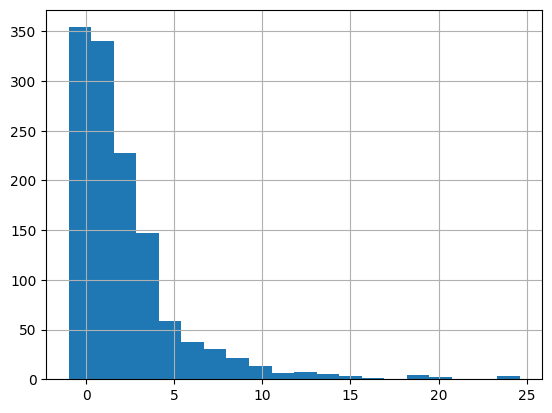

In [48]:
df_final_subset['roi'].hist(bins=20) # right skew

<Axes: >

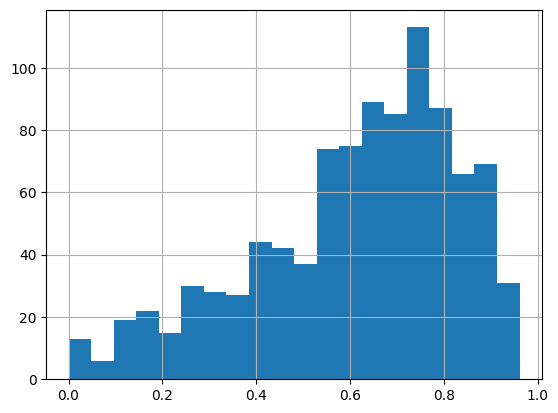

In [49]:
df_final_subset[df_final_subset['profit_margin'] >= 0]['profit_margin'].hist(bins=20)

In [50]:
#Analysis based on seasons

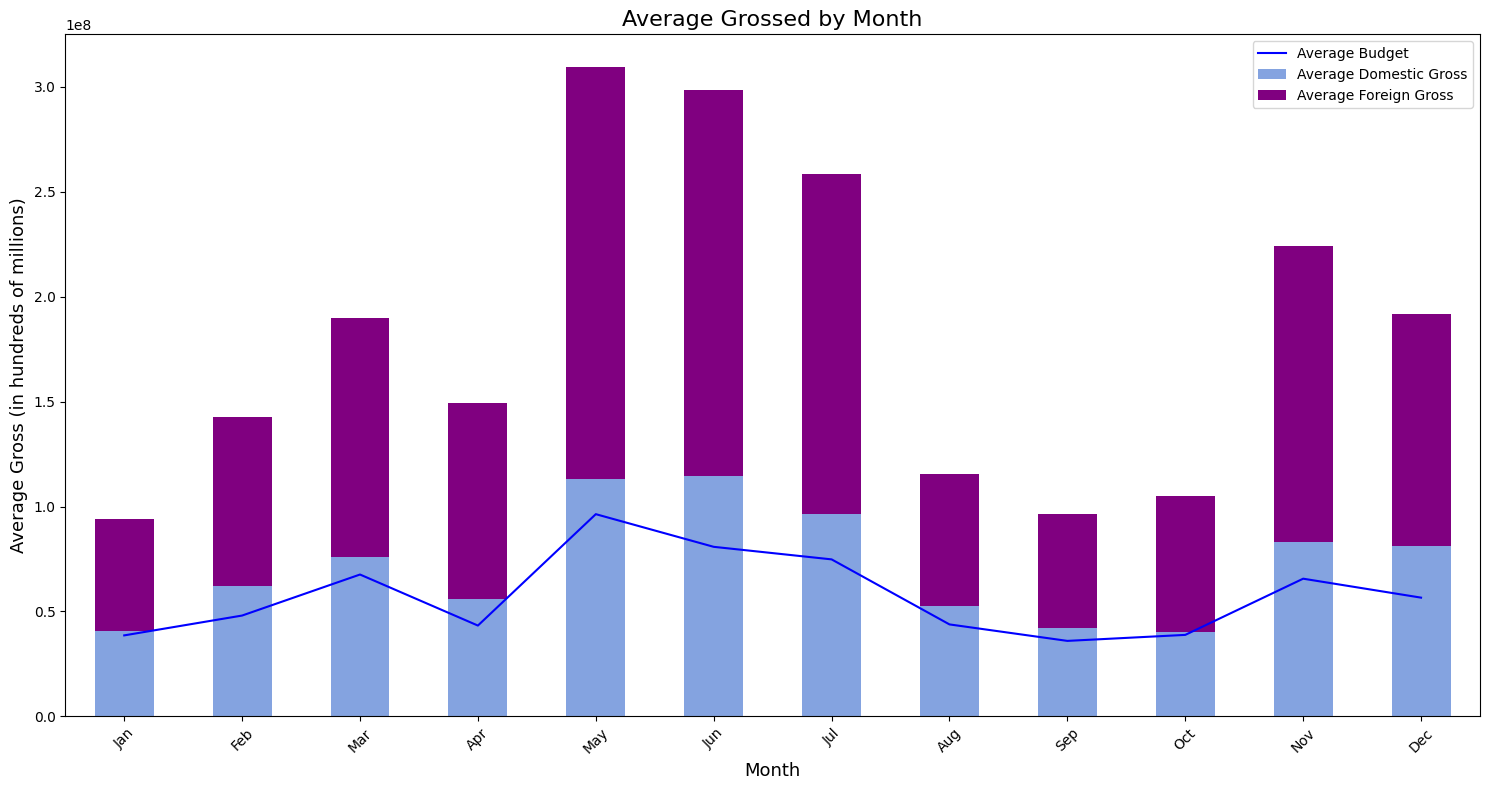

In [51]:
season = pd.DataFrame()

season['month'] = list(set(df_final_subset['month']))
season['month_str'] = [datetime.datetime.strptime(str(month), "%m").strftime("%b")
                       for month in season['month']]
season['avg_dom_gross'] = [(df_final_subset['domestic_gross'][df_final_subset['month']==month].mean())
                                for month in season['month']]
season['avg_fn_gross'] = [(df_final_subset['foreign_gross'][df_final_subset['month']==month].mean())
                                for month in season['month']]
season['avg_ww_gross'] = [(df_final_subset['worldwide_gross'][df_final_subset['month']==month].mean())
                                for month in season['month']]
season['avg_budget'] = [(df_final_subset['production_budget'][df_final_subset['month']==month].mean())
                                for month in season['month']]
season['roi'] = [(df_final_subset['roi'][df_final_subset['month']==month].median())
                                for month in season['month']]
season['pct_foreign'] = [(df_final_subset['pct_foreign'][df_final_subset['month']==month].mean())
                                for month in season['month']]

season = season.sort_values('month')
ax = season[['month_str', 'avg_dom_gross', 'avg_fn_gross']].plot(x='month_str', kind='bar',
                                                                 figsize=(15,8), stacked=True,
                                                                 color=[(0.2, 0.4, 0.8, 0.6), 'purple'])
season.plot(y='avg_budget', x='month_str', ax=ax, color='blue')
plt.xlabel('Month', fontsize=13)
plt.xticks(rotation = 45)
plt.ylabel('Average Gross (in hundreds of millions)', fontsize=13)
plt.title('Average Grossed by Month', fontsize=16)
plt.legend(labels=['Average Budget', 'Average Domestic Gross', 'Average Foreign Gross'])
plt.tight_layout()
plt.savefig("seasons.png", format='png',dpi=150)

<Axes: xlabel='popularity', ylabel='roi'>

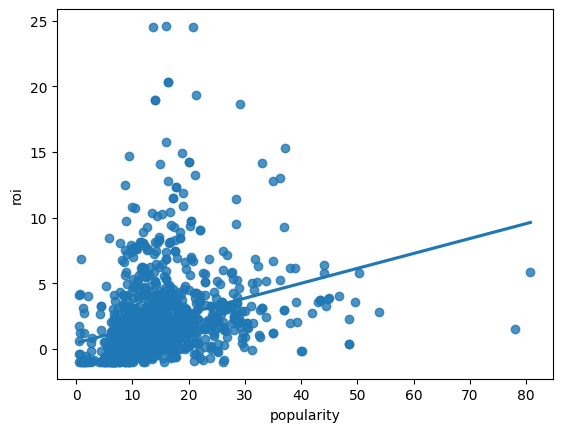

In [52]:
sns.regplot(x=df_final_subset['popularity'], y=df_final_subset['roi'], ci=None)


In [53]:
q1, q3 = np.percentile(df_final_subset['roi'], [25, 75])
iqr = q3 - q1

p95 = np.percentile(df_final_subset['roi'], 95)

print("Interquartile range:", iqr)
print("First Quartile:", q1)
print("Third Quartile:", q3)
print("95th Percentile:", p95)

Interquartile range: 2.8271326874213836
First Quartile: 0.12515717924528302
Third Quartile: 2.952289866666667
95th Percentile: 8.0500023675


<Axes: xlabel='popularity', ylabel='roi'>

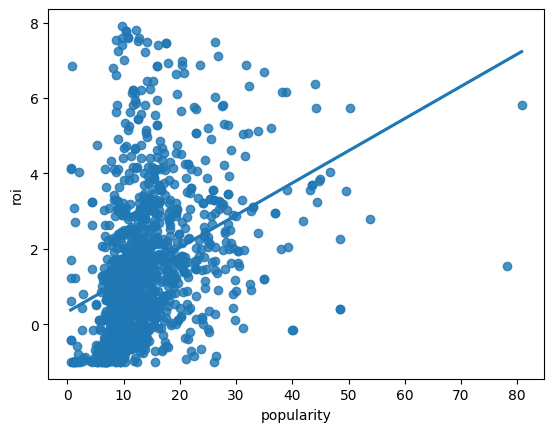

In [54]:
sns.regplot(
    x=df_final_subset['popularity'][df_final_subset['roi'] < 8],
    y=df_final_subset['roi'][df_final_subset['roi'] < 8],
    ci=None
)


<Figure size 960x640 with 0 Axes>

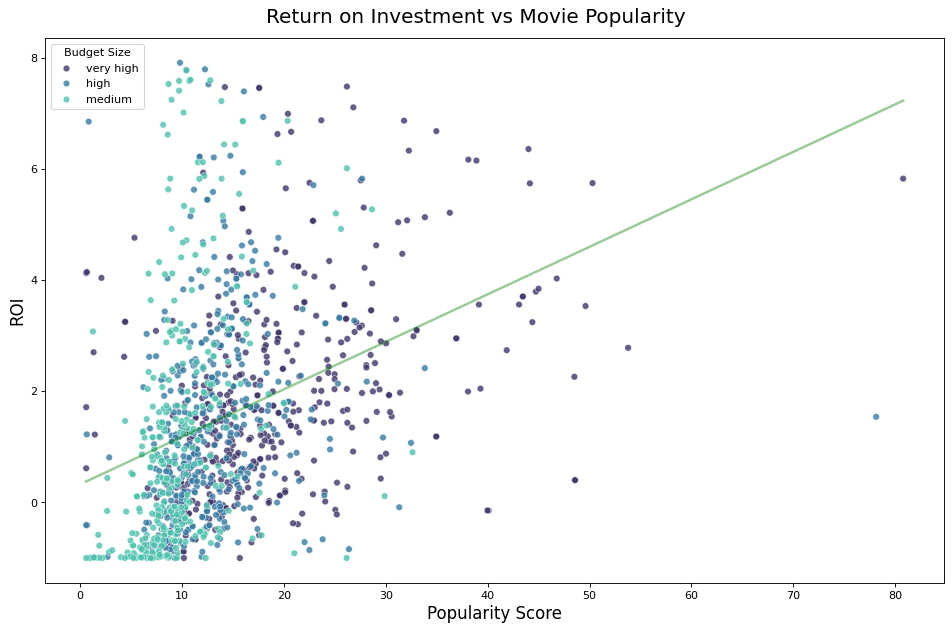

In [55]:
fig = plt.figure(figsize=(12, 8), dpi=80)
fig, ax = plt.subplots(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')

plot = sns.scatterplot(x='popularity', y='roi', data=df_final_subset[df_final_subset['roi'] < 8],
                        hue=df_final_subset.budget_category, legend='full', alpha = 0.8,
                        palette='mako')

# adding regression line
sns.regplot(data=df_final_subset[df_final_subset['roi'] < 8], x='popularity', y='roi', scatter=False,
            ax=ax, ci=False, color='g', line_kws={'alpha':0.4})

fig.suptitle("Return on Investment vs Movie Popularity", fontsize=18)
ax.set_xlabel("Popularity Score", fontsize=15)
ax.set_ylabel("ROI", fontsize=15)
ax.get_legend().set_title("Budget Size")

plt.tight_layout()
plt.savefig("roi_popularity.png", format='png',dpi=150)

In [56]:
#Analysis on Genre

In [57]:
print("Movies with more than one genre: " + str(len(df_final_subset[df_final_subset['genre_list'].str.len()>1])))
print("Movies with one genre: " + str(len(df_final_subset[df_final_subset['genre_list'].str.len()==1])))

Movies with more than one genre: 1067
Movies with one genre: 193


In [58]:
genres = pd.DataFrame()
genres['genre'] = list(set([item for sublist in df_final_subset['genre_list'] for item in sublist]))

# dropping empty values
genres = genres[~genres['genre'].isnull()].reset_index(drop=True)

genres['count'] = [sum(df_final_subset[f'{genre}']) for genre in genres['genre']]
genres['gross'] = [sum(df_final_subset['worldwide_gross'][df_final_subset[f'{genre}']==1])
                   for genre in genres['genre']]
genres['profit'] = [sum(df_final_subset['profit'][df_final_subset[f'{genre}']==1])
                    for genre in genres['genre']]
genres['avg_profit_per_movie'] = genres['profit'] / genres['count']
genres['avg_budget'] = [df_final_subset['production_budget'][df_final_subset[f'{genre}']==1].mean()
                        for genre in genres['genre']]
genres['roi'] = [df_final_subset['roi'][df_final_subset[f'{genre}']==1].mean() for genre in genres['genre']]
genres['pct_foreign'] = [df_final_subset['pct_foreign'][df_final_subset[f'{genre}']==1].mean()
                         for genre in genres['genre']]
genres['profit_margin'] = genres['profit'] / genres['gross']
genres['vote_avg'] = [df_final_subset['vote_average'][df_final_subset[f'{genre}']==1].mean()
                      for genre in genres['genre']]
genres['popularity'] = [df_final_subset['popularity'][df_final_subset[f'{genre}']==1].mean()
                        for genre in genres['genre']]

# budget category
for k,v in genres.iterrows():
    if genres.loc[k, 'avg_budget'] < 21000000:
        genres.loc[k, 'budget_category'] = 'medium'
    elif ((genres.loc[k, 'avg_budget'] >= 21000000) &
          (genres.loc[k, 'avg_budget'] < 52250000)):
        genres.loc[k, 'budget_category'] = 'high'
    else:
        genres.loc[k, 'budget_category'] = 'very high'

In [59]:
display(genres.sort_values('roi', ascending=False))

# will exclude documentary category since there are only 6 in the data
genres = genres[genres['genre'] != 'Documentary'].reset_index(drop=True)

,genre,count,gross,profit,avg_profit_per_movie,avg_budget,roi,pct_foreign,profit_margin,vote_avg,popularity,budget_category
17,Horror,103,11433894154,8026594154,7.792810e+07,3.308058e+07,3.389840,0.541094,0.702000,5.807767,13.169718,high
10,Documentary,6,756632425,478632425,7.977207e+07,4.633333e+07,2.886214,0.548687,0.632582,6.400000,5.881833,high
8,Animation,109,41456366568,30681866568,2.814850e+08,9.884862e+07,2.695279,0.612435,0.740100,6.544037,15.732413,very high
12,Romance,156,18251426642,12619526642,8.089440e+07,3.610192e+07,2.512485,0.501984,0.691427,6.475641,11.694763,high
1,Family,170,55355999945,39706599945,2.335682e+08,9.205529e+07,2.512180,0.579380,0.717295,6.457059,15.197329,very high
5,Comedy,432,73348622494,51983322494,1.203318e+08,4.945671e+07,2.316872,0.452771,0.708716,6.257639,13.192153,high
7,Music,35,4227519643,2948019643,8.422913e+07,3.655714e+07,2.297203,0.359387,0.697340,6.477143,10.231857,high
15,Adventure,287,114859571883,80914471883,2.819320e+08,1.182756e+08,2.172222,0.620374,0.704464,6.441463,19.532899,very high
4,Fantasy,153,57029415024,39420715024,2.576517e+08,1.150895e+08,2.141698,0.619291,0.691235,6.332026,19.841471,very high
3,Science Fiction,175,58577281983,40610081983,2.320576e+08,1.026697e+08,2.115982,0.604315,0.693274,6.393143,19.698886,very high


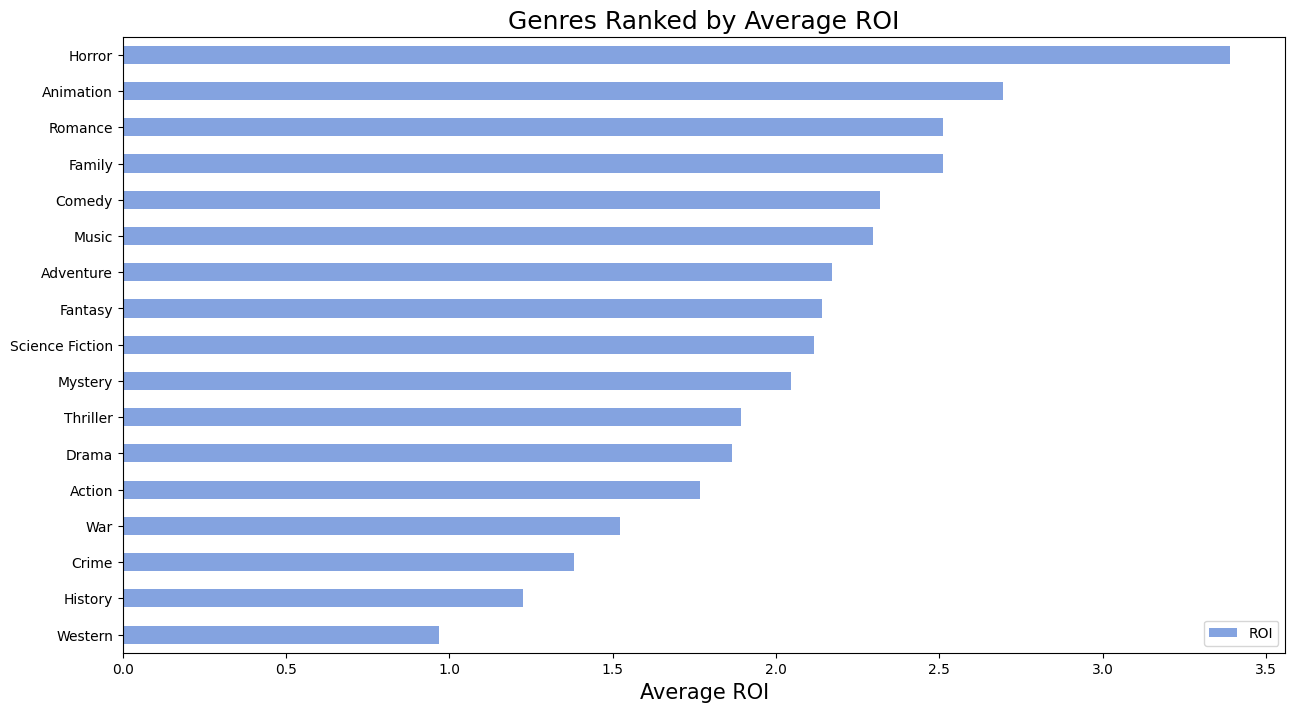

In [60]:
genres[['genre', 'roi']].sort_values('roi', ascending=True).plot(x='genre', kind='barh', figsize=(15,8),
                                                                 stacked=True, color=(0.2, 0.4, 0.8, 0.6))
plt.xlabel('Average ROI', fontsize=15)
plt.ylabel('Genre', fontsize=15).set_visible(False)
plt.title('Genres Ranked by Average ROI',fontsize=18)
plt.legend(labels=['ROI'])
plt.savefig("genre_roi.png", format='png',dpi=150)

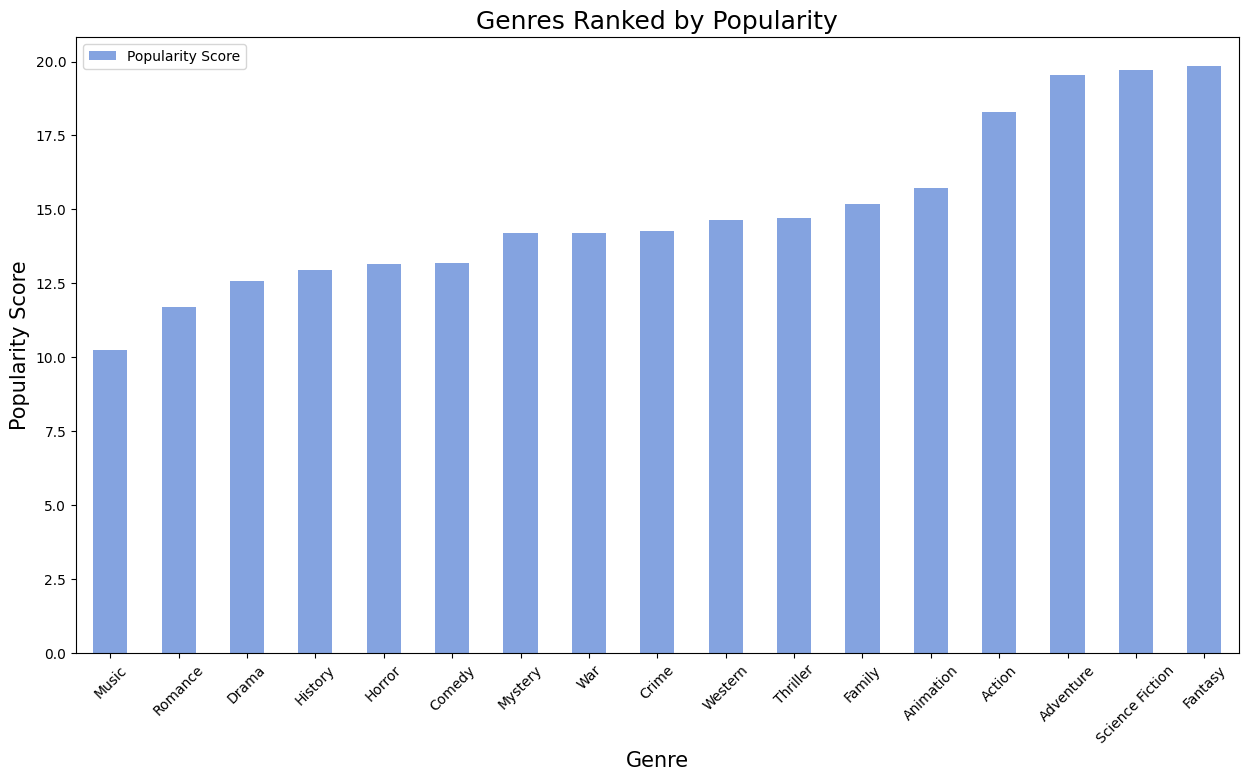

In [61]:
genres[['genre', 'popularity']].sort_values('popularity', ascending=True).plot(x='genre', kind='bar',
                                                                               figsize=(15,8), stacked=True,
                                                                               color=(0.2, 0.4, 0.8, 0.6))
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Popularity Score', fontsize=15)
plt.xticks(rotation = 45)
plt.title('Genres Ranked by Popularity',fontsize=18)
plt.legend(labels=['Popularity Score'])
plt.savefig("genre_popularity.png", format='png',dpi=150)

In [62]:
#Correlation heatmap

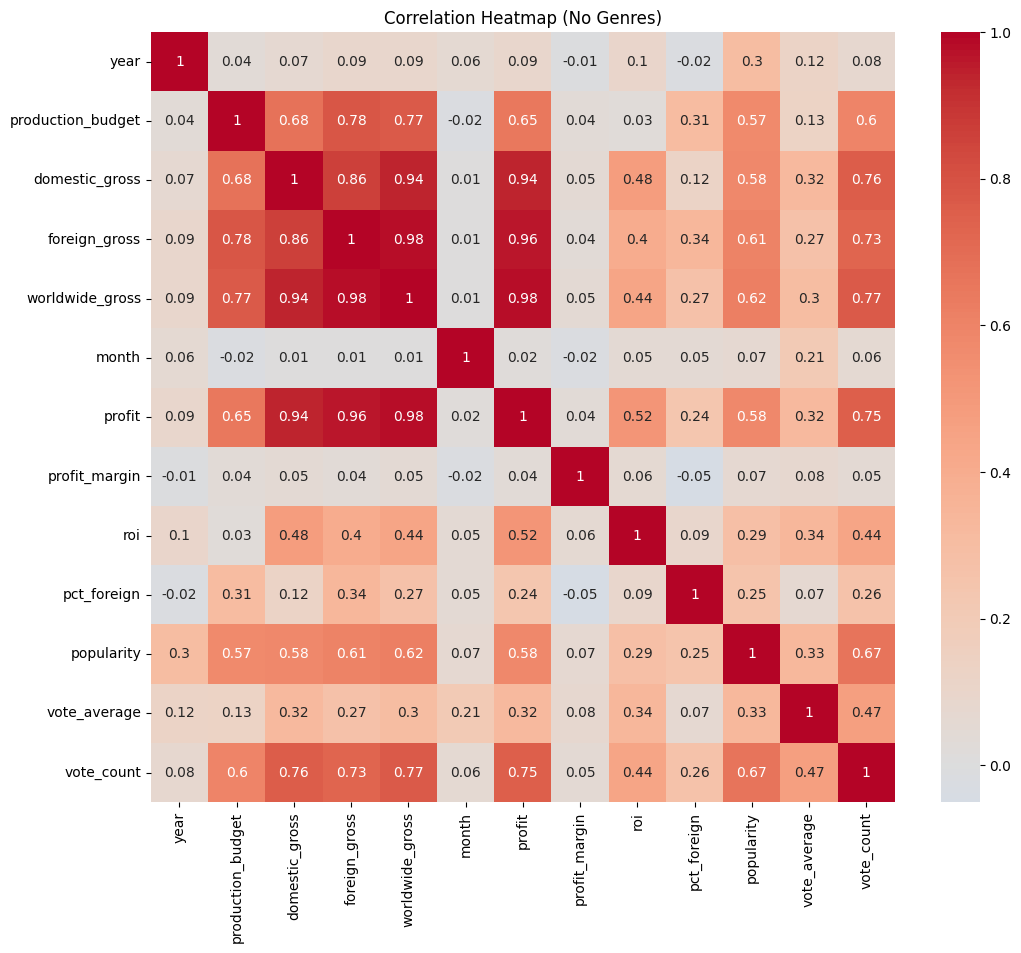

In [63]:
# Remove genre columns (assuming they are all 0/1 binary dummies)
genre_cols = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
              'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
              'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']

# Select numeric columns except genres
numeric_df_filtered = df_final_subset.select_dtypes(include='number').drop(columns=genre_cols)

# Plot a cleaner heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df_filtered.corr().round(2), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (No Genres)")
plt.show()



In [64]:
df_final.columns

Index(['movie', 'year', 'production_budget', 'domestic_gross', 'foreign_gross',
       'worldwide_gross', 'month', 'profit', 'profit_margin', 'roi',
       'pct_foreign', 'match_key', 'popularity', 'release_date',
       'original_language', 'vote_average', 'vote_count', 'genre_list',
       'genres', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [65]:
# Labeling data
df_final['success'] = df_final['roi'].apply(lambda x: 1 if x > 1 else 0)


In [66]:
# Select relevant features
feature_cols = [
    'production_budget', 'popularity', 'vote_average', 'vote_count', 'month',
    'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
    'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
    'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'
]

X = df_final[feature_cols]
y = df_final['success']

Accuracy: 0.73
Precision: 0.72
Recall: 0.78
F1 Score: 0.75
F2 Score: 0.76
Confusion Matrix:
[[120  54]
 [ 40 138]]


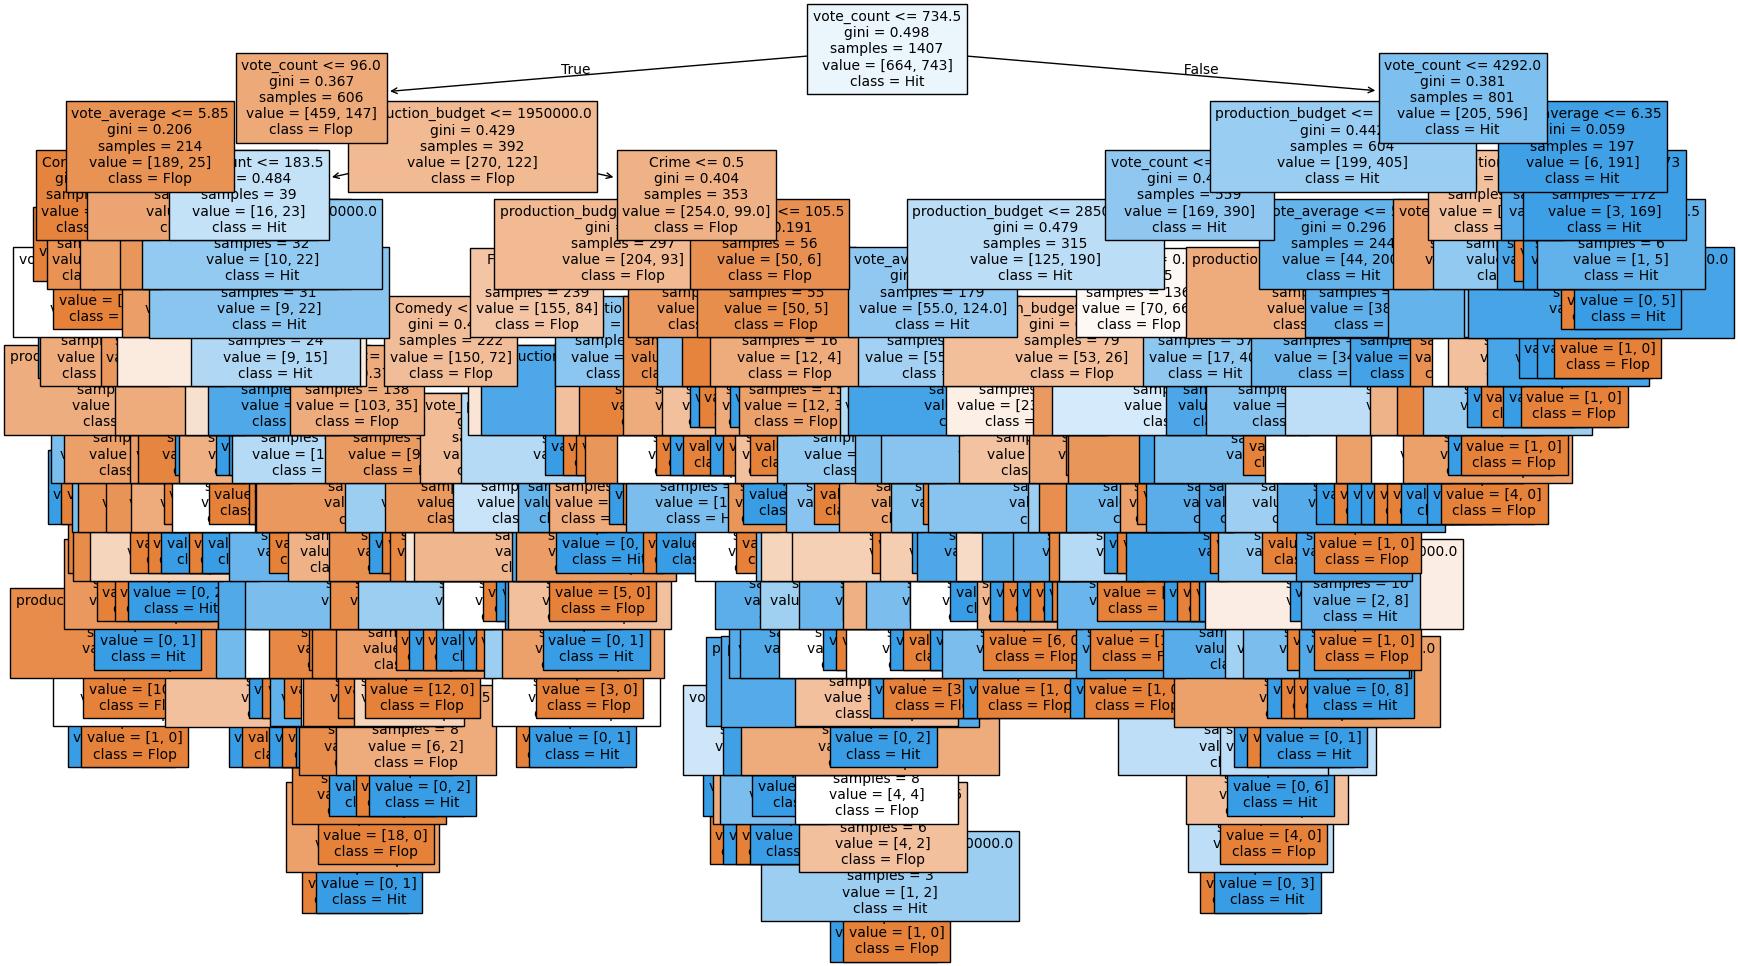

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"F2 Score: {f2:.2f}")
print("Confusion Matrix:")
print(cm)

# Visualizing
plt.figure(figsize=(20, 12))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Flop", "Hit"], fontsize=10)
plt.show()

Accuracy: 0.80
Precision: 0.78
Recall: 0.84
F1 Score: 0.81
F2 Score: 0.83
Confusion Matrix:
[[132  42]
 [ 29 149]]


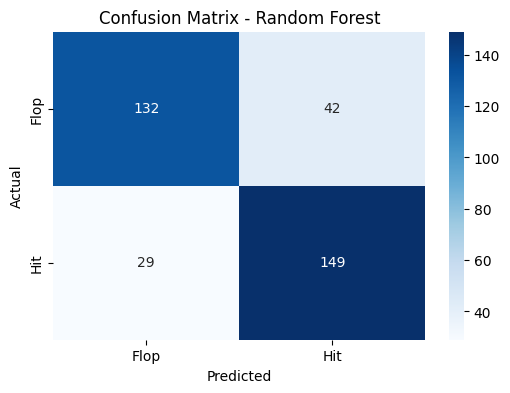

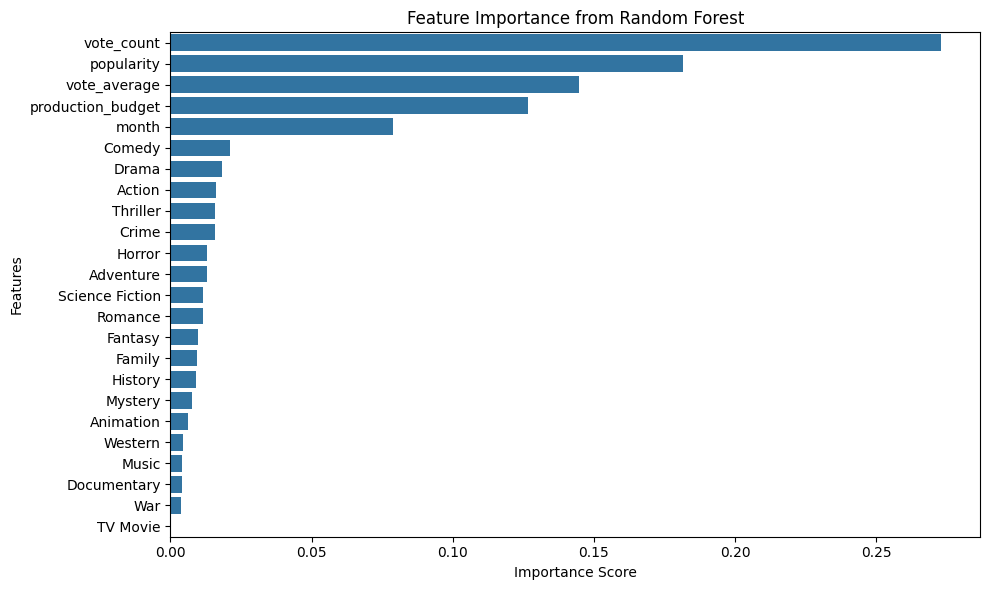

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = rf.predict(X_test)

# Step 6: Evaluate the model
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"F2 Score: {f2:.2f}")
print("Confusion Matrix:")
print(cm)

# Step 7: Optional - Confusion Matrix Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Flop', 'Hit'], yticklabels=['Flop', 'Hit'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Step 8: Optional - Feature Importance
importances = rf.feature_importances_
features = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=features.values, y=features.index)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

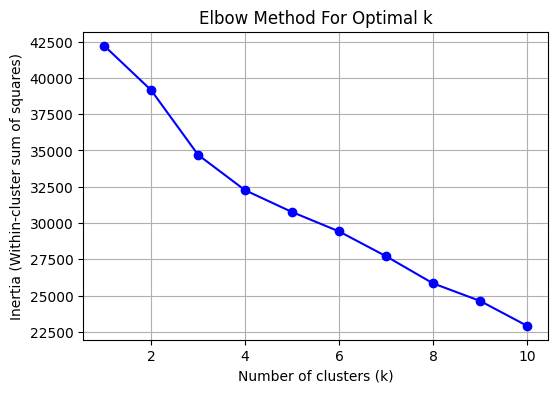

In [69]:
features_kmeans = [
    'production_budget', 'popularity', 'vote_average', 'vote_count', 'month',
    'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
    'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
    'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'
]

X_kmeans = df_final[features_kmeans]

#  Scaling the data (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_kmeans)

#  Elbow Method to find optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()



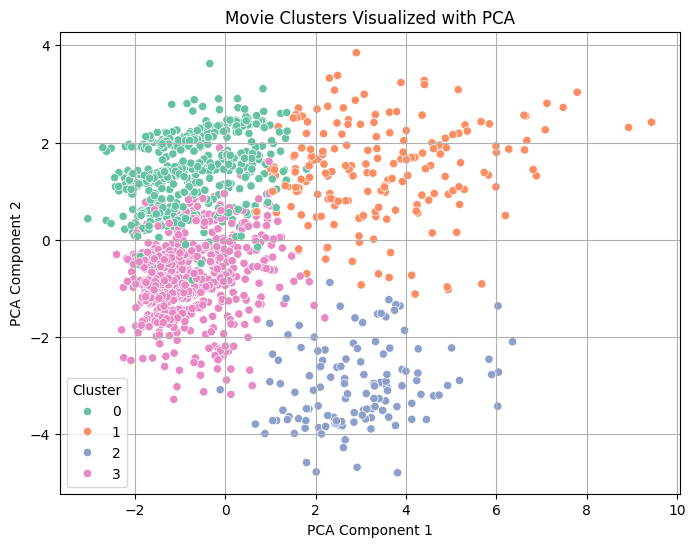

              roi  production_budget  popularity  vote_average
cluster                                                       
0        3.910776       2.467981e+07   11.428557      5.892500
1        2.567426       1.388958e+08   23.916304      6.566822
2        2.651534       9.918623e+07   16.102514      6.514493
3        2.290134       2.183093e+07    9.930675      6.506375


In [70]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_final['cluster'] = kmeans.fit_predict(X_scaled)

# Step 5: Visualize the clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_final['pca1'] = X_pca[:, 0]
df_final['pca2'] = X_pca[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_final, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title('Movie Clusters Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

 #Analyzing clusters
cluster_summary = df_final.groupby('cluster')[['roi', 'production_budget', 'popularity', 'vote_average']].mean()
print(cluster_summary)

<Figure size 1200x800 with 0 Axes>

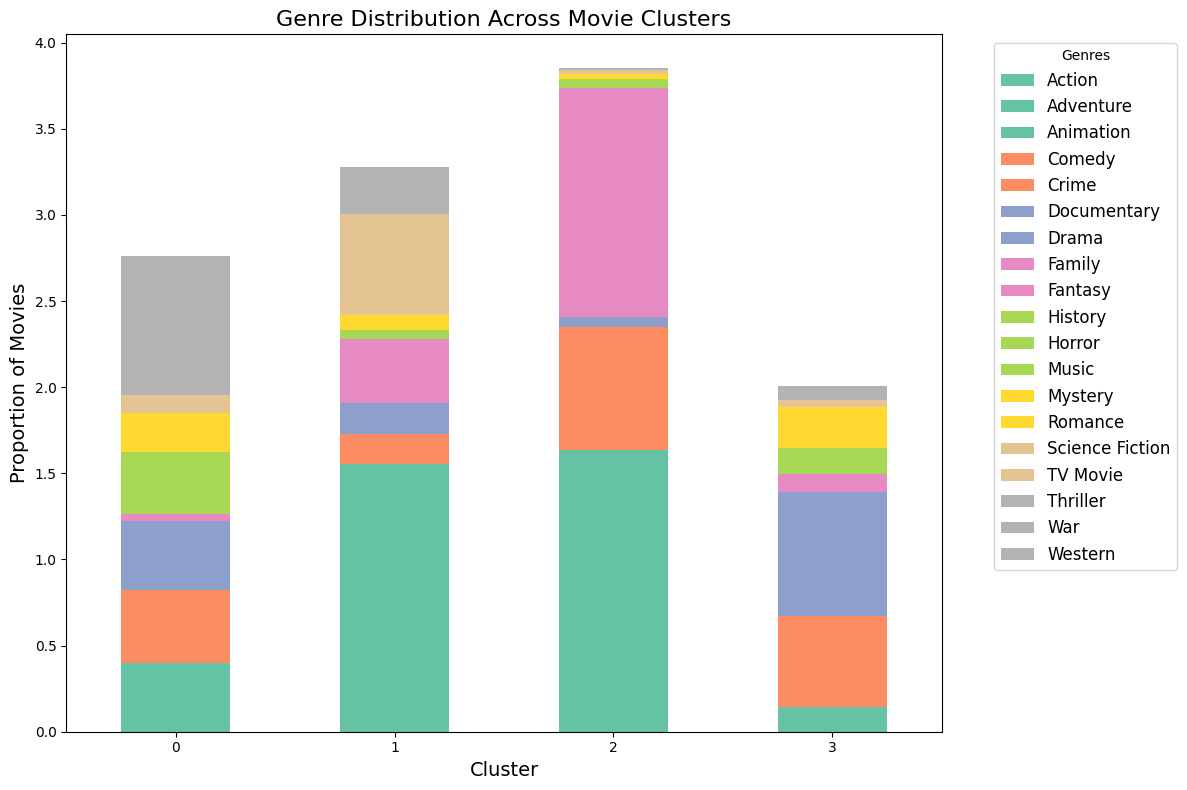

In [71]:

# Grouping by cluster and calculate average for each genre
genre_columns = [
    'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
    'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
    'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'
]

# Get the genre distribution per cluster
genre_distribution = df_final.groupby('cluster')[genre_columns].mean()

# Step 2: Plot the stacked bar chart
plt.figure(figsize=(12, 8))
genre_distribution.plot(kind='bar', stacked=True, colormap='Set2', figsize=(12, 8))
plt.title('Genre Distribution Across Movie Clusters', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Proportion of Movies', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()
